# Purpose

The purpose of this project is to apply the use of K Nearest Neighbors alorithmn in a KNN model.  Atfer producing the intial model, the next purpose it to optimize the KNN model by deciding on which k-value to use.  This project will use a common breast cancer dataset to model.  The primary focus is on modeling rather than data analysis that has been demonstrated in previous projects that used this dataset.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import itertools

In [2]:
df1 = pd.read_csv('C:\\Users\\JB\\PracPythonCoding\\Full Stack Data Scientist Bootcamp\\02 Python Dataset\\datasets\\wisc_bc_data.csv')

In [3]:
df1.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,87139402,B,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,...,13.50,15.64,86.97,549.1,0.1385,0.1266,0.12420,0.09391,0.2827,0.06771
1,8910251,B,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,...,11.88,22.94,78.28,424.8,0.1213,0.2515,0.19160,0.07926,0.2940,0.07587
2,905520,B,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.02480,...,12.41,26.44,79.93,471.4,0.1369,0.1482,0.10670,0.07431,0.2998,0.07881
3,868871,B,11.28,13.39,73.00,384.8,0.11640,0.11360,0.04635,0.04796,...,11.92,15.77,76.53,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784
4,9012568,B,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,...,16.20,15.73,104.50,819.1,0.1126,0.1737,0.13620,0.08178,0.2487,0.06766


# Values Analysis

In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 569 non-null    int64  
 1   diagnosis          569 non-null    object 
 2   radius_mean        569 non-null    float64
 3   texture_mean       569 non-null    float64
 4   perimeter_mean     569 non-null    float64
 5   area_mean          569 non-null    float64
 6   smoothness_mean    569 non-null    float64
 7   compactness_mean   569 non-null    float64
 8   concavity_mean     569 non-null    float64
 9   points_mean        569 non-null    float64
 10  symmetry_mean      569 non-null    float64
 11  dimension_mean     569 non-null    float64
 12  radius_se          569 non-null    float64
 13  texture_se         569 non-null    float64
 14  perimeter_se       569 non-null    float64
 15  area_se            569 non-null    float64
 16  smoothness_se      569 non

In [5]:
df1.isnull().sum()

id                   0
diagnosis            0
radius_mean          0
texture_mean         0
perimeter_mean       0
area_mean            0
smoothness_mean      0
compactness_mean     0
concavity_mean       0
points_mean          0
symmetry_mean        0
dimension_mean       0
radius_se            0
texture_se           0
perimeter_se         0
area_se              0
smoothness_se        0
compactness_se       0
concavity_se         0
points_se            0
symmetry_se          0
dimension_se         0
radius_worst         0
texture_worst        0
perimeter_worst      0
area_worst           0
smoothness_worst     0
compactness_worst    0
concavity_worst      0
points_worst         0
symmetry_worst       0
dimension_worst      0
dtype: int64

In [6]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
id,569.0,3.037183e+07,1.250206e+08,8670.000000,869218.000000,906024.000000,8.813129e+06,9.113205e+08
radius_mean,569.0,1.412729e+01,3.524049e+00,6.981000,11.700000,13.370000,1.578000e+01,2.811000e+01
texture_mean,569.0,1.928965e+01,4.301036e+00,9.710000,16.170000,18.840000,2.180000e+01,3.928000e+01
perimeter_mean,569.0,9.196903e+01,2.429898e+01,43.790000,75.170000,86.240000,1.041000e+02,1.885000e+02
area_mean,569.0,6.548891e+02,3.519141e+02,143.500000,420.300000,551.100000,7.827000e+02,2.501000e+03
smoothness_mean,569.0,9.636028e-02,1.406413e-02,0.052630,0.086370,0.095870,1.053000e-01,1.634000e-01
compactness_mean,569.0,1.043410e-01,5.281276e-02,0.019380,0.064920,0.092630,1.304000e-01,3.454000e-01
concavity_mean,569.0,8.879932e-02,7.971981e-02,0.000000,0.029560,0.061540,1.307000e-01,4.268000e-01
points_mean,569.0,4.891915e-02,3.880284e-02,0.000000,0.020310,0.033500,7.400000e-02,2.012000e-01
symmetry_mean,569.0,1.811619e-01,2.741428e-02,0.106000,0.161900,0.179200,1.957000e-01,3.040000e-01


**In the min column, there are some zero values.  I assume this is normal**

In [7]:
col = df1.columns

In [8]:
for i in col:
    if len(df1[i].unique()) < 20:
        print('The unique values in column **{}** are: {}'.format(i,df1[i].unique()))
        print('The number of unique values in column **{}** are: {}'.format(i,len(df1[i].unique())))
        print('')
    else:
        print('The number of unique values in column **{}** are: {}'.format(i,len(df1[i].unique())))
        print('')

The number of unique values in column **id** are: 569

The unique values in column **diagnosis** are: ['B' 'M']
The number of unique values in column **diagnosis** are: 2

The number of unique values in column **radius_mean** are: 456

The number of unique values in column **texture_mean** are: 479

The number of unique values in column **perimeter_mean** are: 522

The number of unique values in column **area_mean** are: 539

The number of unique values in column **smoothness_mean** are: 474

The number of unique values in column **compactness_mean** are: 537

The number of unique values in column **concavity_mean** are: 537

The number of unique values in column **points_mean** are: 542

The number of unique values in column **symmetry_mean** are: 432

The number of unique values in column **dimension_mean** are: 499

The number of unique values in column **radius_se** are: 540

The number of unique values in column **texture_se** are: 519

The number of unique values in column **peri

### Converting the Diagnosis column to categorical dtype

In [9]:
df1['diagnosis'] = df1['diagnosis'].astype('category')
df1['diagnosis'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 569 entries, 0 to 568
Series name: diagnosis
Non-Null Count  Dtype   
--------------  -----   
569 non-null    category
dtypes: category(1)
memory usage: 821.0 bytes


**The Diagnosis is rather balanced so bias should be minimal**

In [10]:
df1['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [11]:
df1.drop('id', axis=1, inplace=True)

# The Model

In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

### Train, Test, Split, and Scaling

In [13]:
X = df1.drop('diagnosis', axis=1)
y = df1['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, np.ravel(y), test_size=0.3, random_state=36)

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)

### Modeling with a random k value of 3

In [14]:
from sklearn.neighbors import KNeighborsClassifier

In [15]:
knn = KNeighborsClassifier(n_neighbors=3, weights='distance' )
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3, weights='distance')

In [16]:
y_pred = knn.predict(X_test)

In [17]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [18]:
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           B       0.94      0.98      0.96       102
           M       0.97      0.91      0.94        69

    accuracy                           0.95       171
   macro avg       0.96      0.95      0.95       171
weighted avg       0.95      0.95      0.95       171

[[100   2]
 [  6  63]]


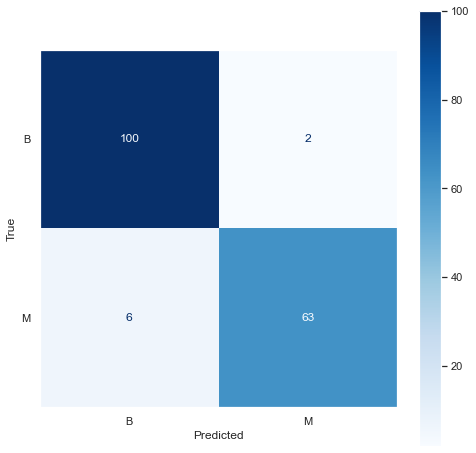

In [19]:
cm = confusion_matrix(y_test,y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=['B','M'])
fig, ax = plt.subplots(figsize=(8,8))
cmd.plot(include_values=True, cmap='Blues', ax=ax)
cmd.ax_.set(xlabel='Predicted', ylabel='True', autoscale_on=True)
plt.grid(visible=None)

## Optimizing k-value

In [20]:
from sklearn.model_selection import cross_val_score

In [21]:
kscores = []

for i in range(1,20):
    knn = KNeighborsClassifier(n_neighbors=i)
    scores = cross_val_score(knn, X_train, y_train, cv=140 )
    kscores.append(scores.mean())

In [22]:
len(kscores)

19

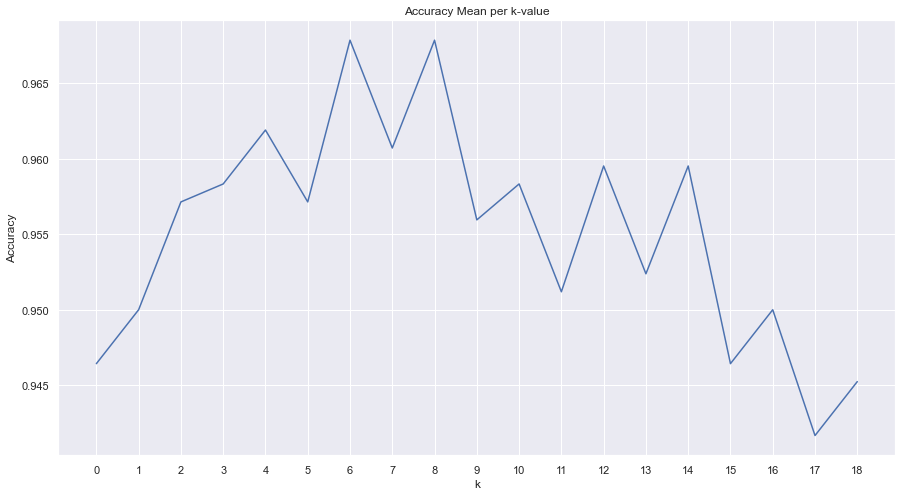

In [23]:
plt.figure(figsize=(15,8))
plt.xticks(range(0,19))
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('Accuracy Mean per k-value')
plt.plot(kscores)

**+1 to the k-value where Accuracy is its highest.  This is because the count starts at 0 but 0 is really k=1**

### The model with a more optimized k-value

In [24]:
knn = KNeighborsClassifier(n_neighbors=9, weights='distance' )
knn.fit(X_train,y_train)

y_pred = knn.predict(X_test)

print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           B       0.95      0.99      0.97       102
           M       0.98      0.93      0.96        69

    accuracy                           0.96       171
   macro avg       0.97      0.96      0.96       171
weighted avg       0.97      0.96      0.96       171

[[101   1]
 [  5  64]]


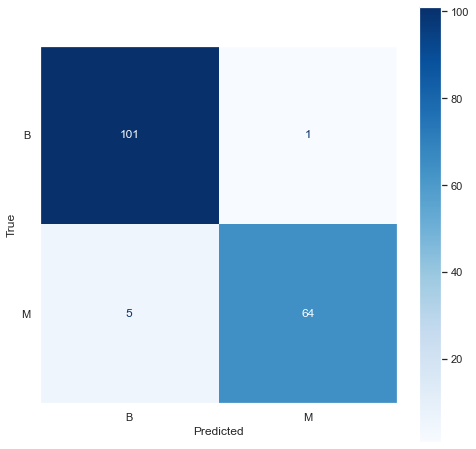

In [25]:
cm = confusion_matrix(y_test,y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=['B','M'])
fig, ax = plt.subplots(figsize=(8,8))
cmd.plot(include_values=True, cmap='Blues', ax=ax)
cmd.ax_.set(xlabel='Predicted', ylabel='True', autoscale_on=True)
plt.grid(visible=None)

# Conclusion

Optimizing the KNN model from k=3 to k=9 imporved the model by reducing false positives and false negatives.  The model was rather accurate before optimization at 95% and improved its accuracy to 96%.